In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from IPython.display import display
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\Hp\\Desktop\\train\\train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [11]:
missing_postal_code_rows = df[df['Postal Code'].isna()]
print(missing_postal_code_rows[['City','State','Postal Code']].drop_duplicates())

            City    State  Postal Code
2234  Burlington  Vermont          NaN


In [16]:
city_name = "Burlington"  
print(df[df['City'] == city_name]['Postal Code'])


683     27217.0
684     27217.0
1008    52601.0
1038    27217.0
1039    27217.0
1393    27217.0
2234        NaN
2928    27217.0
5065    27217.0
5066    27217.0
5274        NaN
8317    27217.0
8318    27217.0
8410    27217.0
8798        NaN
9146        NaN
9147        NaN
9148        NaN
9209    52601.0
9210    52601.0
9386        NaN
9387        NaN
9388        NaN
9389        NaN
9741        NaN
Name: Postal Code, dtype: float64


In [17]:
df['Postal Code'].fillna(27217.0, inplace=True)  

In [18]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [19]:
# Convert 'order date and ship date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

In [20]:
print(df.isna().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [21]:
# detect duplicated records
df[df.duplicated(subset = None, keep = False)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [22]:
# drop Country
df = df.drop(['Country'], axis = 1)

In [23]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [24]:
print(df.columns)  # Ensure 'Region' exists before encoding

df = pd.get_dummies(df, columns=['Region'], drop_first=False)
print(df.columns)  # Ensure encoded columns are present

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Postal Code', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Region_Central', 'Region_East', 'Region_South',
       'Region_West'],
      dtype='object')


In [33]:
# Feature Engineering for CLV
df_clv = df.groupby('Customer ID').agg({
    'Sales': 'sum',                  # Total revenue from customer
    'Order ID': 'count',              # Number of orders
    'Region_East': 'max',             # Encoded region data
    'Region_South': 'max',
    'Region_West': 'max',
    'Region_Central': 'max'
}).reset_index()

In [34]:
df_clv.rename(columns={'Order ID': 'Order Frequency'}, inplace=True)

In [35]:

# Target variable: Estimate CLV as total sales * order frequency (simplified approach)
df_clv['CLV'] = df_clv['Sales'] * df_clv['Order Frequency']
# Define features and target
X = df_clv[['Sales', 'Order Frequency', 'Region_East', 'Region_South', 'Region_West', 'Region_Central']]
y = df_clv['CLV']
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 3126.215838867923
R² Score: 0.9713543037937507


    Customer ID     Sales  Order Frequency  Region_East  Region_South  \
0      AA-10315  5563.560               11         True         False   
1      AA-10375  1056.390               15         True          True   
2      AA-10480  1790.512               12         True          True   
3      AA-10645  5086.935               18         True          True   
4      AB-10015   886.156                6        False         False   
..          ...       ...              ...          ...           ...   
788    XP-21865  2374.658               28         True          True   
789    YC-21895  5454.350                8         True         False   
790    YS-21880  6720.444               12         True          True   
791    ZC-21910  8025.707               31         True          True   
792    ZD-21925  1493.944                9        False          True   

     Region_West  Region_Central         CLV  Predicted_CLV  
0           True            True   61199.160   60977.795350  

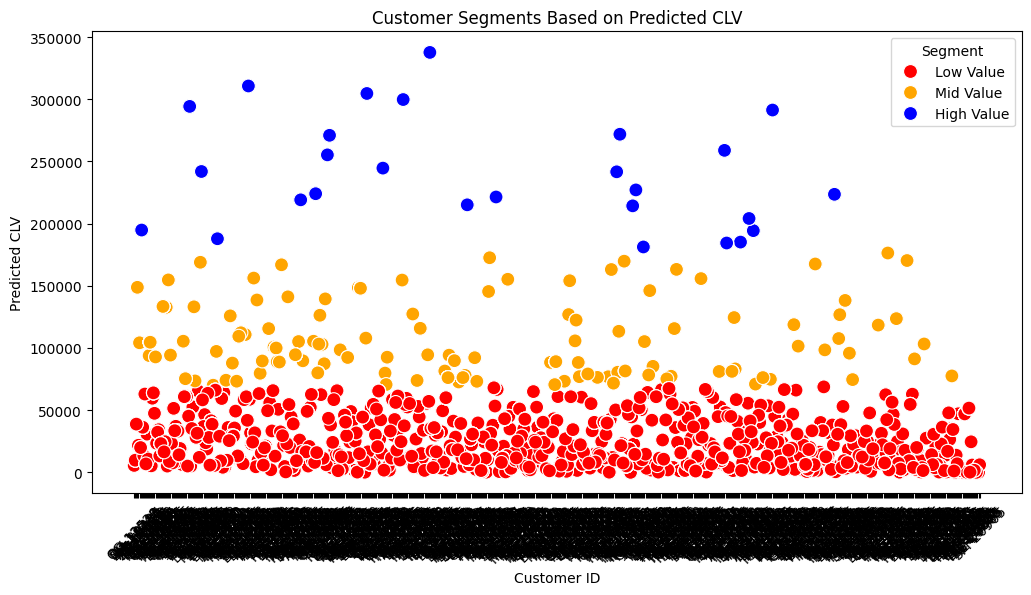

In [37]:
import seaborn as sns
from sklearn.cluster import KMeans

# Display top customers by predicted CLV
df_clv['Predicted_CLV'] = model.predict(X)
top_customers = df_clv[['Customer ID', 'Predicted_CLV']].sort_values(by='Predicted_CLV', ascending=False)
print(df_clv)

# Merge with original dataset (df) based on Customer ID
df_merged = df.merge(df_clv[['Customer ID', 'Predicted_CLV']], on="Customer ID", how="left")

# Apply K-Means Clustering on Predicted CLV
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_merged["Cluster"] = kmeans.fit_predict(df_merged[["Predicted_CLV"]])

# Define Labels Based on Cluster Centers
cluster_labels = ["Low Value", "Mid Value", "High Value"]
df_merged["Segment"] = df_merged["Cluster"].map({i: cluster_labels[i] for i in np.argsort(kmeans.cluster_centers_.flatten())})

# Plot Customer Segmentation
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_merged["Customer ID"], y=df_merged["Predicted_CLV"], hue=df_merged["Segment"], palette=["red", "orange", "blue"], s=100)
plt.xticks(rotation=45)
plt.xlabel("Customer ID")
plt.ylabel("Predicted CLV")
plt.title("Customer Segments Based on Predicted CLV")
plt.legend(title="Segment")
plt.show()
